Enter image URLs (comma-separated): https://m.media-amazon.com/images/I/7185qvsa6WL._SX522_.jpg


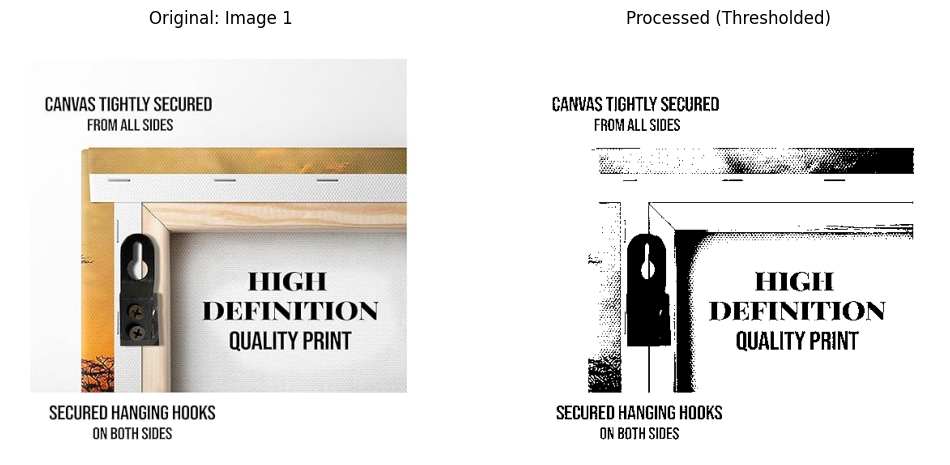


Extracted Text from Image 1:
CANVAS TIGHTLY SECURED
FROM ALL SIDES
‘ke. Neo
- | | HIGH
“aE DEFINITION
si = QUALITY PRINT
SECURED HANGING HOOKS
ON BOTH SIDES
--------------------------------------------------


In [27]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import pytesseract

def download_image(image_url):
    image_url = image_url.strip()  # Remove extra spaces
    if not image_url.startswith("http"):  # Check if URL is valid
        print(f"Skipping invalid URL: {image_url}")
        return None

    try:
        response = requests.get(image_url, timeout=10)  # Set timeout to avoid hanging
        if response.status_code == 200:
            image = Image.open(BytesIO(response.content))
            image = image.convert("RGB")  # Ensure image is in RGB mode
            return image
        else:
            print(f"Error {response.status_code}: Unable to download image from {image_url}")
            return None
    except requests.RequestException as e:
        print(f"Request error: {e}")
        return None

def preprocess_image(image):
    image_cv = np.array(image)
    image_gray = cv2.cvtColor(image_cv, cv2.COLOR_RGB2GRAY) if len(image_cv.shape) == 3 else image_cv
    image_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return Image.fromarray(image_thresh)  # Convert back to PIL Image for compatibility

def extract_text(image):
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(image, config=custom_config)
    return text.strip()  # Remove unnecessary spaces and newlines

def display_images(original, processed, title):
    """Display the original and processed images side by side."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Show Original Image
    ax[0].imshow(original)
    ax[0].set_title(f"Original: {title}")
    ax[0].axis("off")

    # Show Processed Image
    ax[1].imshow(processed, cmap="gray")
    ax[1].set_title("Processed (Thresholded)")
    ax[1].axis("off")

    plt.show()

def main():
    image_urls = input("Enter image URLs (comma-separated): ").split(",")
    image_urls = [url.strip() for url in image_urls if url.strip()]  # Remove empty values

    if not image_urls:
        print("No valid image URLs provided.")
        return

    for idx, image_url in enumerate(image_urls, start=1):
        image = download_image(image_url)
        if image:
            processed_image = preprocess_image(image)
            display_images(image, processed_image, f"Image {idx}")

            extracted_text = extract_text(processed_image)
            print(f"\nExtracted Text from Image {idx}:\n{extracted_text}\n" + "-"*50)

if __name__ == "__main__":
    main()
